In [21]:
import os
import pandas as pd
import geopandas as gpd
import datetime as dt
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
DROOT = os.path.join('./1-data/')
drootf = lambda path: os.path.join(DROOT, path)

(4053, 41)


,postcode4,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry,kmarea,utm_centroid
0,1184.0,625,320,305,100,90,110,215,110,70,10,10,10,10,255,70,70,20,95,2.4,245,165,10,-99997,10,20,10,25,-99997,20,80,20,15,10,902,15,585,4,"MULTIPOLYGON (((121294.892 478995.293, 121341....",0.121549,POINT (121274.166 478898.955)


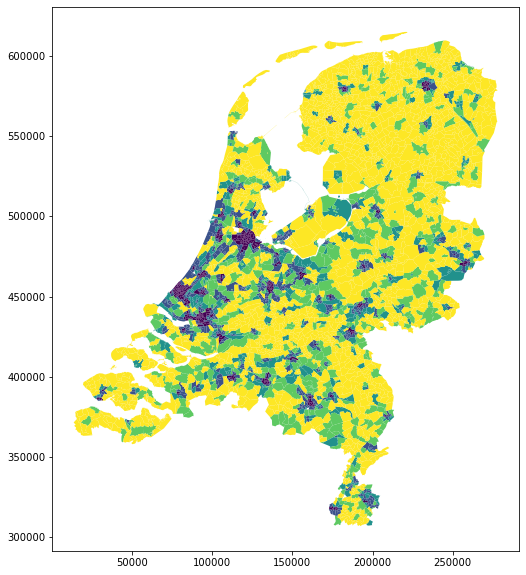

In [79]:
postcodes = gpd.read_file(drootf('2023-CBS_pc4_2022_v1/cbs_pc4_2022_v1.gpkg'))
postcodes.postcode4 = postcodes.postcode4.astype(float)
postcodes['kmarea'] = postcodes.to_crs(postcodes.estimate_utm_crs()).area / 10e6 # to Km2
postcodes['utm_centroid'] = postcodes.to_crs(postcodes.estimate_utm_crs()).centroid.to_crs(postcodes.crs)
postcodes = postcodes[postcodes.stedelijkheid > 0] # Some regions with harbours
pc_reduced = postcodes[['postcode4', 'stedelijkheid', 'geometry', 'utm_centroid']]

ax = postcodes.plot(figsize=(10,10), column='stedelijkheid')
print(postcodes.shape)
postcodes.head(1)

In [99]:
odin_df = pd.concat([
    pd.read_csv(drootf('ODiN/ODiN2021_Databestand.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2022_Databestand.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2018_Databestand_v2.0.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2019_Databestand_v2.0.csv'), sep=';', encoding= 'unicode_escape')
])
odin_df

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,WrkVervw,WrkVerg,VergVast,VergKm,VergBrSt,VergOV,VergAans,VergVoer,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerZiek,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725401,1,0,1,9,8,6,3,12,1,0,1363.0,1.0,34,5,40,15,18,21,0,1319.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,16,0,9,16,15,15,4,210,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540101,1,75,0,7,1,2,3,2,16,0,16,15,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725402,2,0,1,1,8,6,3,12,4,0,1319.0,1.0,34,5,40,15,18,21,0,1363.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,19,45,12,20,0,15,4,#NULL!,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540201,1,75,0,7,1,2,3,2,19,45,20,0,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,62344112710,1,1,2,2,3,0,0,0,2,8423,85,5,4,2,6,0,20,18.0,21.0,1,72,16,1,0,2,7,3,10,10,8,9,10,2,0,2,1,0,1,1,0,1,1,0,0,2007,1,4,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,1,3,3,9.0,5,1,5,5,2,4,5,9.0,4,2021,1,1,4,2,0,1,0,0,0,0,6,0,0,1,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,64,180,0,1,6234411271001,1,0,1,2,1,1,3,12,1,0,8423.0,1.0,85,2,6,20,18,21,0,8423.0,1.0,85,2,6,20,18,21

In [44]:
KHvm_transl = {
    "1": "Personenauto - bestuurder",
    "2": "Personenauto - passagier",
    "3": "Trein",
    "4": "Bus/tram/metro",
    "5": "Fiets",
    "6": "Te voet",
    "7": "Overig",
}

In [100]:
odin_gdf = odin_df.copy()
odin_gdf = odin_gdf.merge(pc_reduced, how='left', left_on='VertPC', right_on='postcode4', suffixes=(None, '_vert'))
odin_gdf = odin_gdf.merge(pc_reduced, how='left', left_on='AankPC', right_on='postcode4', suffixes=(None, '_aank'))
odin_gdf = gpd.GeoDataFrame(odin_gdf)
print(odin_gdf.shape)
odin_gdf.head(2)

(771151, 255)


,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,WrkVervw,WrkVerg,VergVast,VergKm,VergBrSt,VergOV,VergAans,VergVoer,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerZiek,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB,postcode4,stedelijkheid,geometry,utm_centroid,postcode4_aank,stedelijkheid_aank,geometry_aank,utm_centroid_aank
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725401,1,0,1,9,8,6,3,12,1,0,1363.0,1.0,34,5,40,15,18,21,0,1319.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,16,0,9,16,15,15,4,210,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540101,1,75,0,7,1,2,3,2,16,0,16,15,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1363.0,2.0,"MULTIPOLYGON (((137535.799 486541.372, 137539....",POINT (138755.631 485392.747),1319.0,4.0,"MULTIPOLYGON (((140096.744 488731.661, 140100....",POINT (140629.218 489425.605)
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725402,2,0,1,1,8,6,3,12,4,0,1319.0,1.0,34,5,40,15,18,21,0,1363.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,19,45,12,20,0,15,4,#NULL!,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540201,1,75,0,7,1,2,3,2,19,45,20,0,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319.0,4.0,"MULTIPOLYGON (((140096.744 488731.661, 140100....",POINT (140629.2

In [101]:
rit_cols = ['Rit','RitID','RitNr','AfstR','AfstRBL','KAfstR','Rvm','RvmRol','RAantIn','KRvm','RVertUur','RVertMin','RAankUur','RAankMin','RReisduur','RReisduurBL','RVertStat','RAankStat','RTSamen','RCorrSnelh','RVliegVer']
car_cols = ['WrkVervw	WrkVerg	VergVast	VergKm	VergBrSt	VergOV	VergAans	VergVoer	VergBudg	VergPark	VergStal	VergAnd	BerWrk	RdWrkA	RdWrkB	BerOnd	RdOndA	RdOndB	BerSup	RdSupA	RdSupB	BerZiek	RdZiekA	RdZiekB	BerArts	RdArtsA	RdArtsB	BerStat	RdStatA	RdStatB	BerHalte	RdHalteA	RdHalteB	BerFam	RdFamA	RdFamB	BerSport	RdSportA	RdSportB']

odin_gdf = odin_gdf.drop_duplicates('VerplID').drop(columns=)
odin_gdf = odin_gdf[odin_gdf.VertPC != odin_gdf.AankPC]
odin_gdf = odin_gdf[odin_gdf.Weggeweest == 1]
odin_gdf['ReportDate'] = pd.to_datetime(dict(year=odin_gdf.Jaar, month=odin_gdf.Maand, day=odin_gdf.Dag))
odin_gdf['KHvm_transl'] = odin_gdf.KHvm.replace(KHvm_transl)

print(odin_gdf.shape)
odin_gdf.head(2) 

(430610, 236)


,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,FactorH,FactorP,FactorV,WrkVervw,WrkVerg,VergVast,VergKm,VergBrSt,VergOV,VergAans,VergVoer,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerZiek,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB,postcode4,stedelijkheid,geometry,utm_centroid,postcode4_aank,stedelijkheid_aank,geometry_aank,utm_centroid_aank,ReportDate,KHvm_transl
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725401,1,0,1,9,8,6,3,12,1,0,1363.0,1.0,34,5,40,15,18,21,0,1319.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,16,0,9,16,15,15,4,210,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1363.0,2.0,"MULTIPOLYGON (((137535.799 486541.372, 137539....",POINT (138755.631 485392.747),1319.0,4.0,"MULTIPOLYGON (((140096.744 488731.661, 140100....",POINT (140629.218 489425.605),2021-01-17,Personenauto - passagier
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725402,2,0,1,1,8,6,3,12,4,0,1319.0,1.0,34,5,40,15,18,21,0,1363.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,19,45,12,20,0,15,4,#NULL!,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319.0,4.0,"MULTIPOLYGON (((140096.744 488731.661, 140100....",POINT (140629.218 489425.605),1363.0,2.0,"MULTIPOLYGON (((137535.799 486541.372, 137539....",POINT (138755.631 485392.747),2021-01-17,Personenauto - passagier


In [105]:
odin_gdf.VerplID#.duplicated().sum()

0         6234410725401
1         6234410725402
9         6234413382102
10        6234413382103
11        6234413382104
              ...      
771143    6204141386102
771145    6204144867401
771146    6204144867402
771148    6204152112101
771149    6204152112102
Name: VerplID, Length: 430610, dtype: object

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,postcode4,stedelijkheid,geometry,utm_centroid,postcode4_aank,stedelijkheid_aank,geometry_aank,utm_centroid_aank,ReportDate,KHvm_transl
154349,1,65389271199,4,1,2,2,3,0,0,0,2,1769,1911,5,4,8,18,0,19,18.0,21.0,1,55,13,1,3,0,2,3,9,8,8,9,9,2,0,2,1,0,1,2,0,1,1,0,0,2008,1,4,1,1,0,0,2005,1,2,2,7,7,6,9995,9,7,0,0,0,0,0,0,1,2,3,1.0,1,5,5,5,2,5,5,5.0,4,2021,10,39,1,6,0,1,0,0,0,0,2,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,60,180,0,1,6538927119901,1,0,1,2,1,1,3,12,1,0,1769.0,1.0,1911,8,18,19,18,21,0,1704.0,1.0,398,8,19,17,18,21,0.0,0,0.0,90,7,8,4,5,6,0,2,6,30,30,7,570,0,1,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,653892711990101,1,90,0,7,8,4,11,5,6,0,6,30,30,0,0.0,0.0,13,0,0,91,183,66746,1769.0,5.0,"MULTIPOLYGON (((118791.490 532337.730, 118796....",POINT (117342.507 531406.827),1704.0,4.0,"MULTIPOLYGON (((119090.262 526322.885, 119100....",POINT (118701.947 523105.745),2021-10-01,Fiets
154350,0,65389271199,4,1,2,2,3,0,0,0,2,1769,1911,5,4,8,18,0,19,18.0,21.0,1,55,13,1,3,0,2,3,9,8,8,9,9,2,0,2,1,0,1,2,0,1,1,0,0,2008,1,4,1,1,0,0,2005,1,2,2,7,7,6,9995,9,7,0,0,0,0,0,0,1,2,3,1.0,1,5,5,5,2,5,5,5.0,4,2021,10,39,1,6,0,1,0,0,0,0,2,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,60,180,0,1,6538927119902,2,0,1,1,1,1,3,12,3,0,1704.0,1.0,398,8,19,17,18,21,0,1769.0,1.0,1911,8,18,19,18,21,0.0,0,0.0,90,7,8,4,5,16,0,9,16,30,30,7,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,653892711990201,1,90,0,7,8,4,11,5,16,0,16,30,30,0,0.0,0.0,13,0,0,91,183,66746,1704.0,4.0,"MULTIPOLYGON (((119090.262 526322.885, 119100....",POINT (118701.947 523105.745),1769.0,5.0,"MULTIPOLYGON (((118791.490 532337.730, 118796....",POINT (117342.507 531406.827),2021-10-01,Fiets
290094,0,55989245793,1,1,3,3,3,0,1,0,2,1741,441,4,4,8,18,0,17,NaN,NaN,2,38,9,1,3,0,2,4,9,8,8,9,7,2,0,2,1,0,1,2,0,1,1,0,0,2008,2,2,2,1,0,0,1999,1,3,1,7,7,6,9995,9,7,0,0,0,0,0,0,0,2,3,NaN,4,5,5,5,1,2,5,NaN,0,2018,7,28,15,1,0,1,0,0,0,0,5,0,0,5,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,4,25,80,0,1,5598924579303,3,0,1,9,8,6,3,12,1,0,1741.0,1.0,441,8,18,17,NaN,NaN,0,1769.0,1.0,1911,8,18,17,NaN,NaN,0.0,0,0.0,30,4,1,1,1,13,0,7,13,5,5,2,115,0,9,#NULL!,#NU

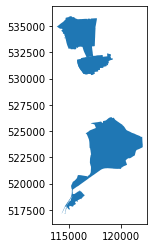

In [97]:
example = odin_gdf[(odin_gdf.VertPC == 1769.0) | (odin_gdf.AankPC == 1769.0)]
example.plot()
example

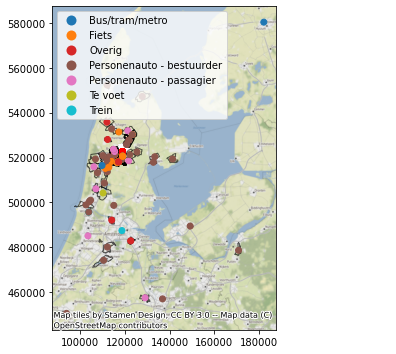

In [50]:
fig, ax = plt.subplots(figsize=(4, 8))
example.geometry.plot(ax=ax, color='#fff', alpha=0.5)
example.geometry_aank.plot(ax=ax, color='None', edgecolor='#000', alpha=0.6)
example.utm_centroid.plot(ax=ax, color='red')
example.set_geometry('utm_centroid_aank').plot(ax=ax, column='KHvm_transl', legend=True)
ctx.add_basemap(ax=ax, crs=example.utm_centroid.crs)

In [82]:
odin_gdf[odin_gdf.KHvm_transl == 'Fiets'].stedelijkheid.value_counts()

1.0    20093
2.0    16811
3.0     8503
4.0     5367
5.0     3553
Name: stedelijkheid, dtype: int64

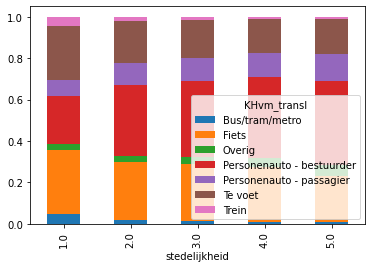

In [93]:
perc = odin_gdf.pivot_table(columns='KHvm_transl', values='Verpl', index='stedelijkheid', aggfunc='count')
perc = perc.div(perc.sum(axis=1), axis=0).plot.bar(stacked=True)

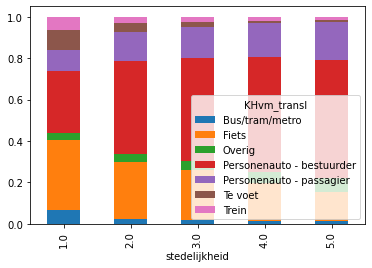

In [89]:
perc = odin_gdf.pivot_table(columns='KHvm_transl', values='Verpl', index='stedelijkheid', aggfunc='count')
perc = perc.div(perc.sum(axis=1), axis=0).plot.bar(stacked=True)

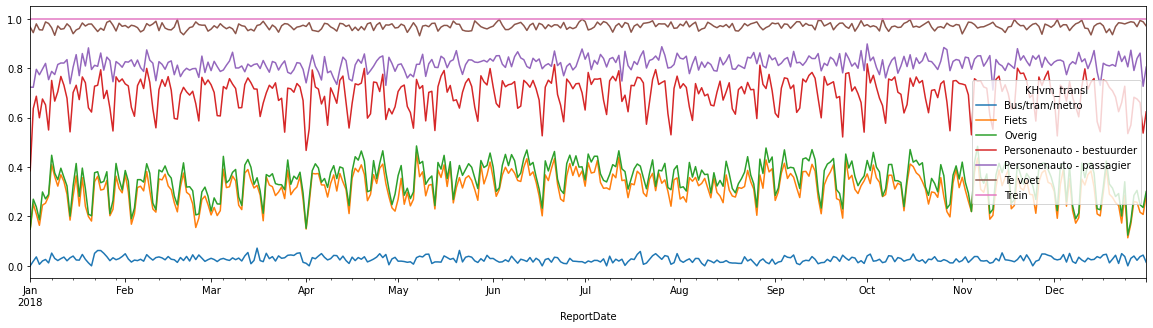

In [94]:
subset = odin_gdf[odin_gdf.ReportDate < dt.datetime(year=2019, month=1, day=1)]
subset = subset.pivot_table(index='ReportDate', columns='KHvm_transl', values='Verpl', aggfunc='count')
subset.div(subset.sum(axis=1), axis=0).plot(figsize=(20,5), stacked=True)

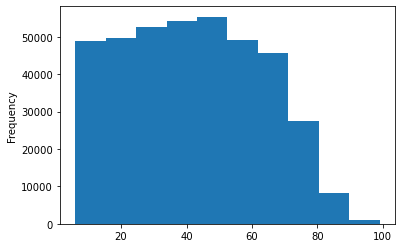

In [13]:
odin_df.Leeftijd.plot.hist()

In [26]:
print(odin_df.Verpl.value_counts())
odin_df_f = odin_df[odin_df.Verpl.isin(['0', '1'])] # Filter serie-verplaatsingen
odin_df_f.Verpl.value_counts()

1         166635
0          19391
#NULL!      8119
6            845
8            132
7            116
Name: Verpl, dtype: int64


1    166635
0     19391
Name: Verpl, dtype: int64

In [30]:
# Aantal ritten per verplaatsing.
odin_df_f.AantRit.value_counts()

1     156006
3      15375
2       7835
4       5036
5       1295
6        216
7        168
8         48
9         36
11        11
Name: AantRit, dtype: int64

In [35]:
odin_df_f['VerplID_unic'] = odin_df_f.VerplID.str.slice(0, 11)
odin_df_f[['VerplID', 'VerplID_unic', 'VerplNr']]

/Users/ivo/opt/anaconda3/envs/thesis-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VerplID,VerplID_unic,VerplNr
0,5583410009301,55834100093,1
1,5583410009302,55834100093,2
2,5583410009303,55834100093,3
3,5583410009304,55834100093,4
4,5583410027901,55834100279,1
...,...,...,...
195233,5894409889504,58944098895,4
195234,5894409889504,58944098895,4
195235,5894410590101,58944105901,1
195236,5894412276501,58944122765,1


In [39]:
# Filter for train only
bike_trip = odin_df_f.groupby('VerplID_unic').apply(lambda x: x.KRvm.isin(['5']).sum() > 0)
print(bike_trip.sum())
bike_trip

20630


VerplID_unic
55834100093     True
55834100279    False
55834100372     True
55834100527     True
55834100589     True
               ...  
58944079830    False
58944090091    False
58944098895    False
58944105901    False
58944122765    False
Length: 49135, dtype: bool

In [53]:
odin_df_f[odin_df_f.Rvm.isin(['7', '8'])].VertPC.value_counts().index

Float64Index([   0.0, 3511.0, 1181.0, 2611.0, 1018.0, 2628.0, 3512.0, 1017.0,
              6525.0, 3584.0,
              ...
              1634.0, 6199.0, 3899.0, 1636.0, 7938.0, 8806.0, 4721.0, 3243.0,
              2374.0, 7863.0],
             dtype='float64', length=3203)

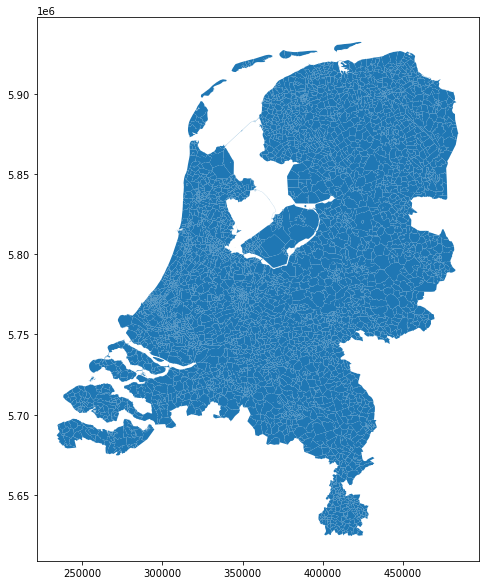

In [76]:
postcodes.to_crs('ESRI:54008').plot(figsize=(10,10))

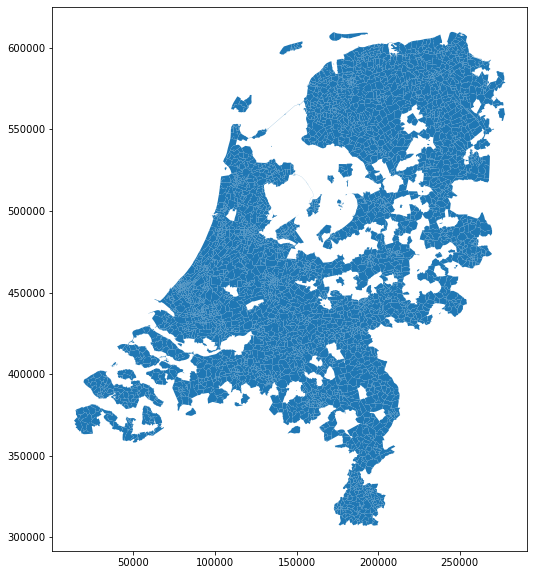

In [67]:
postcodes[postcodes.area < (3 * 10e6)].plot(figsize=(10,10))

In [58]:
bike_pc = odin_df_f[odin_df_f.Rvm.isin(['7', '8'])].VertPC.value_counts()
bike_pc.index = bike_pc.index.astype(int).astype(str)
gdf_bikers = pd.merge(bike_pc, postcodes.set_index('postcode4'), left_index=True, right_index=True)
gdf_bikers.head(4)

,VertPC,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
3511,168,9285,4610,4680,460,1395,4335,1810,1285,70,0,10,10,10,6200,4030,1655,145,375,1.5,5200,2745,90,10,535,1145,290,115,270,4170,30,70,850,555,479,510,5624,1,"MULTIPOLYGON (((136399.702 456517.728, 136409...."
1181,152,20950,10185,10765,4395,2145,5540,5270,3600,50,10,10,10,30,9215,3485,2140,625,2965,2.3,9165,1920,4835,1305,5,335,465,110,185,4705,60,40,995,470,573,695,3262,1,"MULTIPOLYGON (((119679.050 481656.637, 119679...."
2611,148,13250,7300,5955,885,3385,4445,2725,1810,60,0,10,10,20,8845,5960,1960,230,695,1.5,6790,3865,105,95,1155,750,220,255,350,4930,40,60,1465,580,380,580,4711,1,"MULTIPOLYGON (((84384.810 446705.463, 84379.10..."
1018,135,21055,10665,10390,1925,2735,7330,5535,3530,50,0,10,10,20,12760,7855,2840,735,1335,1.6,11750,5230,145,225,1295,3075,985,405,390,11530,30,70,5125,800,494,2070,6959,1,"MULTIPOLYGON (((118297.429 485188.897, 118297...."


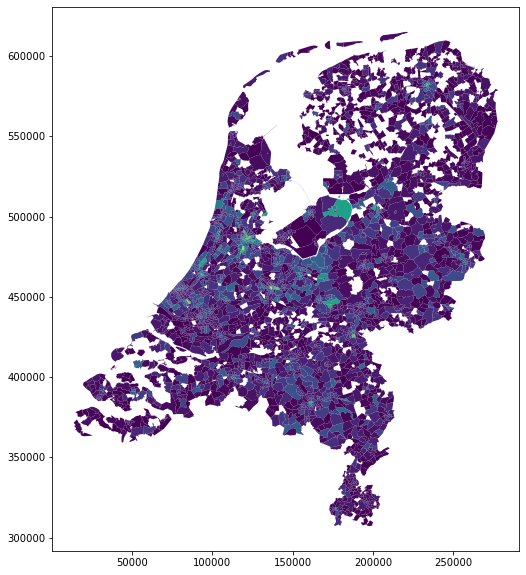

In [62]:
gpd.GeoDataFrame(gdf_bikers).plot(column='VertPC', figsize=(10,10))

In [40]:
odin_df_f[odin_df_f.VerplID_unic == '55834100372']

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,VerplID_unic
7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,55834100372
8,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037202,2,0,1,2,1,1,3,12,3,0,9743.0,1.0,14,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,2,1,9,4,6,12,0,6,12,1,1,1,29,0,3,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720201,1,2,0,1,9,4,11,6,12,0,12,1,1,0,0.0,0.0,13,0,0,115,229,83598,55834100372
9,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037203,3,0,1,4,3,2,3,6,3,0,9743.0,1.0,14,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,2,1,9,4,6,12,30,6,12,40,10,3,320,0,1,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720301,1,2,0,1,9,4,11,6,12,30,12,40,10,0,0.0,0.0,13,0,0,115,229,83598,55834100372
10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!